In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clustered data (adjust path as needed)
data_path = '../../data/nifty/train/featured.csv'
df = pd.read_csv(data_path)

# If you have a saved clustered DataFrame, load it here instead
# df = pd.read_csv('path_to_clustered_data.csv')

# If needed, re-run clustering to get the 'cluster' column
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters
df_clustered.head()

,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,volatility_20,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,macd_signal_strength,stoch_14,stoch_smoothk,stoch_smoothd,cluster
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0,-0.024952,-0.025269,46.8,1396.96,...,0.013554,56.121245,24.611369,26.630119,-2.018750,2.018750,49.268293,74.394226,79.212137,0
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0,0.002498,0.002494,22.6,1393.48,...,0.013097,56.975273,22.668833,25.837862,-3.169029,3.169029,53.475610,66.265109,74.632775,0
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0,-0.000686,-0.000686,12.4,1392.01,...,0.012794,56.648313,20.812784,24.832846,-4.020062,4.020062,52.317073,51.686992,64.115442,0
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0,-0.009936,-0.009986,25.3,1387.36,...,0.013000,51.997258,18.024566,23.471190,-5.446624,5.446624,21.877310,42.556664,53.502922,2
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0,-0.010948,-0.011008,34.4,1375.04,...,0.013127,47.422941,14.438076,21.664568,-7.226491,7.226491,22.279496,32.157960,42.133872,2


In [2]:
# Mean and std of features by cluster
profile = df_clustered.groupby('cluster')[features].agg(['mean', 'std'])
profile

daily_return           log_return           price_range              \
                mean       std       mean       std        mean         std   
cluster                                                                       
0           0.003120  0.010870   0.003057  0.010739   64.406392   43.000418   
1           0.001226  0.008260   0.001192  0.008259  170.478983  111.623270   
2          -0.002939  0.017148  -0.003092  0.017293  117.740670  101.139148   

                 ma_5                      ma_20               ...  \
                 mean          std          mean          std  ...   
cluster                                                        ...   
0         5323.242232  3166.087042   5238.917359  3143.716612  ...   
1        17128.738379  4358.178155  16899.947365  4355.348623  ...   
2         7116.656186  5424.619431   7242.837782  5494.424445  ...   

        macd_signal_12_26             macd_histogram_12_26             \
                     mean         std                 mean        std   
cluster                                                                 
0               31.933733   63.679948            12.068863  20.099293   
1              150.307751  115.636989            15.325810  42.276183   
2              -31.165283  104.293480           -21.955201  31.616414   

          stoch_14            stoch_smoothk            stoch_smoothd  \
              mean        std          mean        std          mean   
cluster                                                                
0        81.234360  15.552375     80.055476  14.041789     78.227618   
1        76.538498  21.427624     77.400889  18.377376     77.651347   
2        25.838974  17.866272     26.999090  15.355038     29.232967   

                    
               std  
cluster             
0        15.697681  
1        17.618636  
2        16.713455  

[3 rows x 28 columns]

/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_7722/2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_7722/2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_7722/2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palet

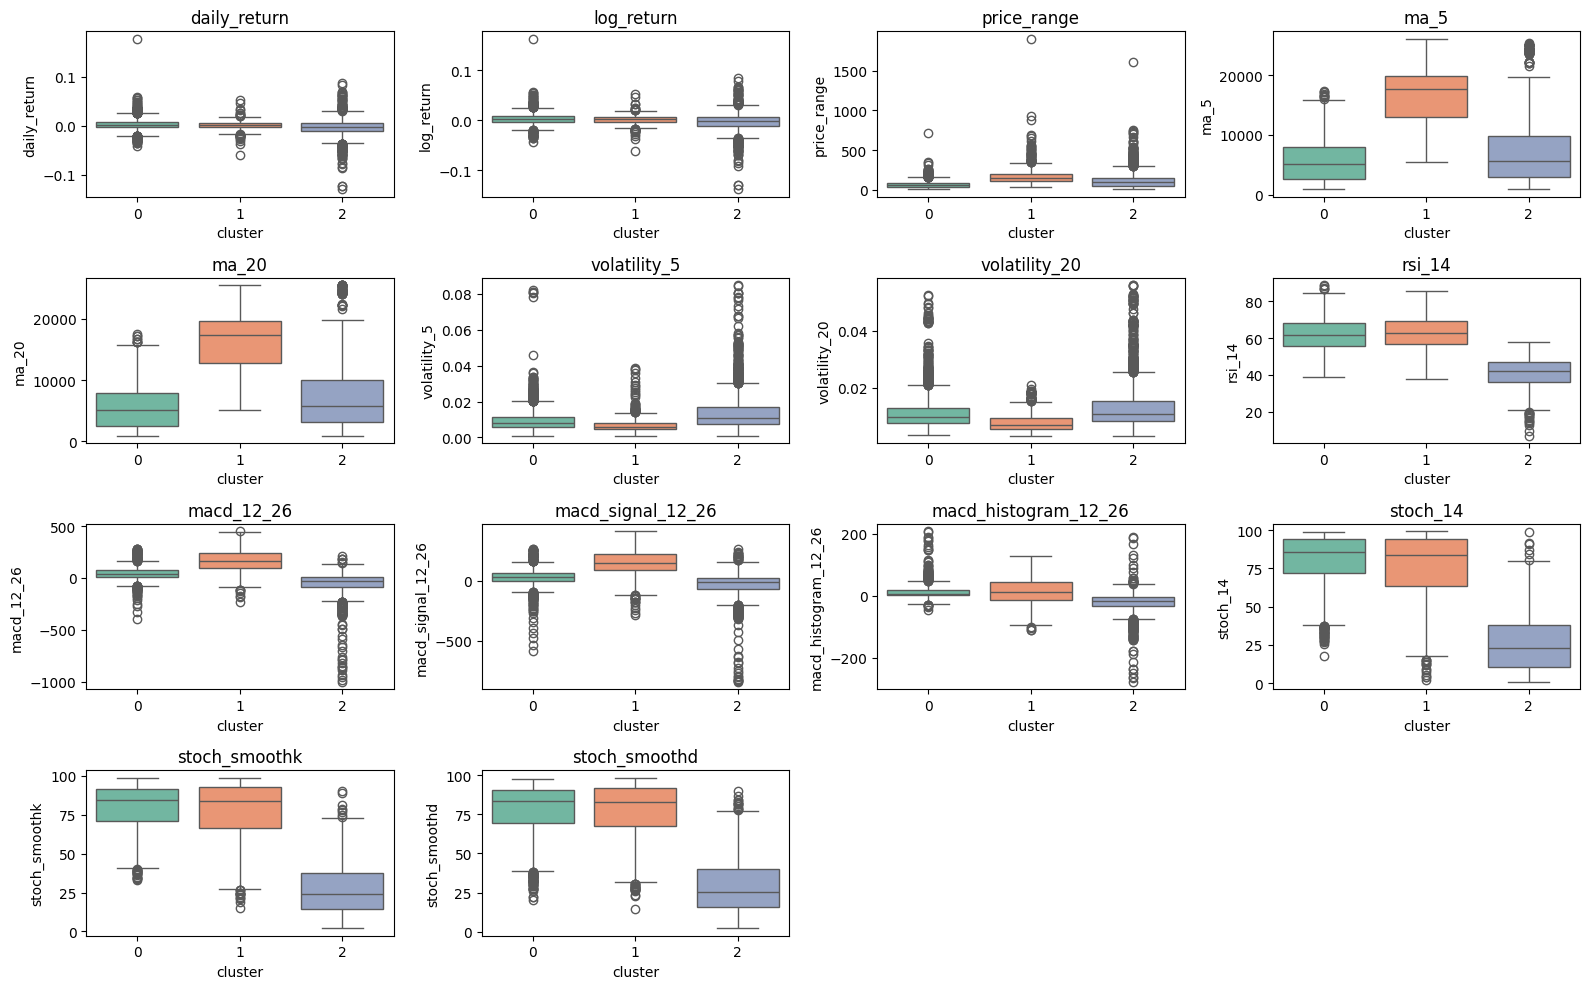

In [3]:
# Boxplots for each feature by cluster
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
    plt.title(feature)
    plt.tight_layout()
plt.show()